# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
Base_url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "apiKey": weather_api_key,
    "format": "json"
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):  
    params["q"] = f"{city}"  # updating "text" to "q"

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(Base_url, params=params).json()

        # Extract latitude and longitude from the API response
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']

        # Append the City information into city_data list
        city_data.append({
            "City_ID": record_count,
            "City": city,
            "Lat": city_lat,
            "Lon": city_lng,
            "Max Temp": city_weather['main']['temp_max'],
            "Humidity": city_weather['main']['humidity'],
            "Cloudiness": city_weather['clouds']['all'],
            "Wind Speed": city_weather['wind']['speed'],
            "Country": city_weather['sys']['country'],
            "Date": city_weather['dt']
        })

        # Log the search results
        print(f"Coordinates for {city} fetched...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error processing {city}: {e}")
        print("City not found. Skipping...")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Create a DataFrame from the city_data list
weather_df = pd.DataFrame(city_data)

# Display sample data to confirm that the coordinates appear
weather_df.head()


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | igarka
Coordinates for igarka fetched...
Processing Record 2 of Set 1 | grytviken
Coordinates for grytviken fetched...
Processing Record 3 of Set 1 | along
Coordinates for along fetched...
Processing Record 4 of Set 1 | nar'yan-mar
Coordinates for nar'yan-mar fetched...
Processing Record 5 of Set 1 | kruisfontein
Coordinates for kruisfontein fetched...
Processing Record 6 of Set 1 | aldama
Coordinates for aldama fetched...
Processing Record 7 of Set 1 | fort st. john
Coordinates for fort st. john fetched...
Processing Record 8 of Set 1 | bethel
Coordinates for bethel fetched...
Processing Record 9 of Set 1 | melissa
Coordinates for melissa fetched...
Processing Record 10 of Set 1 | puerto deseado
Coordinates for puerto deseado fetched...
Processing Record 11 of Set 1 | blackmans bay
Coordinates for blackmans bay fetched...
Processing Record 12 of Set 1 | yellowknife
Coordinates for yellowknife fe

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,igarka,67.4667,86.5833,250.95,80,100,7.17,RU,1706661729
1,3,grytviken,-54.2811,-36.5092,276.69,81,22,4.74,GS,1706661462
2,4,along,28.1667,94.7667,282.94,94,98,0.70,IN,1706661729
3,5,nar'yan-mar,67.6713,53.0870,267.10,92,17,4.92,RU,1706661729
4,6,kruisfontein,-34.0033,24.7314,291.97,84,100,2.52,ZA,1706661730


In [10]:
# # Convert the cities weather data into a Pandas DataFrame
# city_data_df = # YOUR CODE HERE

# # Show Record Count
# city_data_df.count()

#  # Convert the cities weather data into a Pandas DataFrame
# city_data_df = pd.DataFrame(city_data)

# ## Show Record Count
# record_count = city_data_df["City_ID"].count()
# print(f"Record Count: {record_count}")

# ## Display the DataFrame
# city_data_df.head()
# ...

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df["City_ID"].count()
print(f"Record Count: {record_count}")

# Display the DataFrame
city_data_df.head()



Record Count: 587


,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,igarka,67.4667,86.5833,250.95,80,100,7.17,RU,1706661729
1,3,grytviken,-54.2811,-36.5092,276.69,81,22,4.74,GS,1706661462
2,4,along,28.1667,94.7667,282.94,94,98,0.70,IN,1706661729
3,5,nar'yan-mar,67.6713,53.0870,267.10,92,17,4.92,RU,1706661729
4,6,kruisfontein,-34.0033,24.7314,291.97,84,100,2.52,ZA,1706661730


In [11]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,igarka,67.4667,86.5833,250.95,80,100,7.17,RU,1706661729
1,3,grytviken,-54.2811,-36.5092,276.69,81,22,4.74,GS,1706661462
2,4,along,28.1667,94.7667,282.94,94,98,0.70,IN,1706661729
3,5,nar'yan-mar,67.6713,53.0870,267.10,92,17,4.92,RU,1706661729
4,6,kruisfontein,-34.0033,24.7314,291.97,84,100,2.52,ZA,1706661730


In [15]:
import os

# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)


# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,2,igarka,67.4667,86.5833,250.95,80,100,7.17,RU,1706661729
1,3,grytviken,-54.2811,-36.5092,276.69,81,22,4.74,GS,1706661462
2,4,along,28.1667,94.7667,282.94,94,98,0.70,IN,1706661729
3,5,nar'yan-mar,67.6713,53.0870,267.10,92,17,4.92,RU,1706661729
4,6,kruisfontein,-34.0033,24.7314,291.97,84,100,2.52,ZA,1706661730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

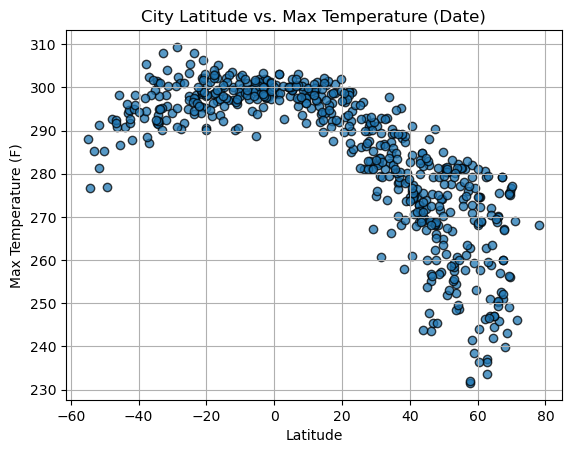

In [18]:


# Build scatter plot for latitude vs. temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

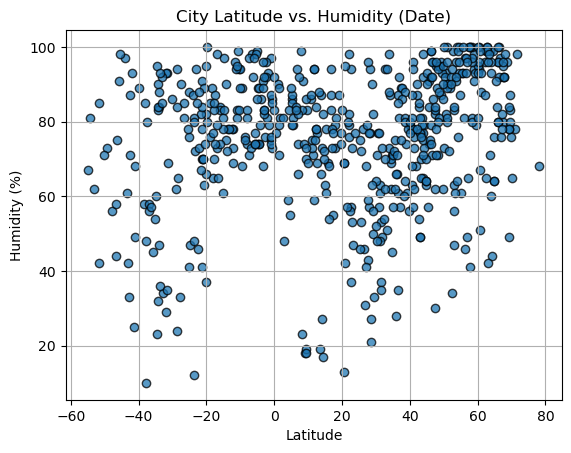

In [19]:
# Build scatter plot for latitude vs. humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

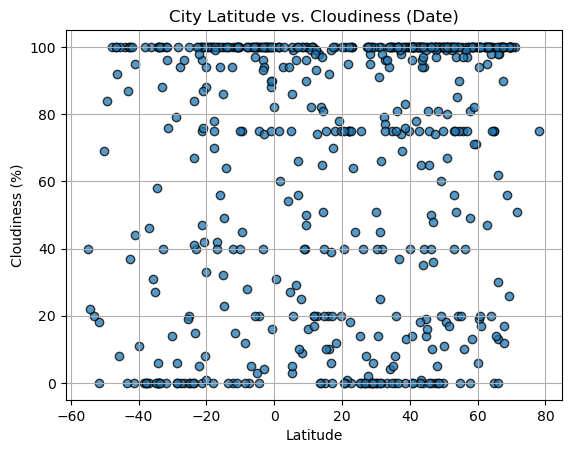

In [20]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

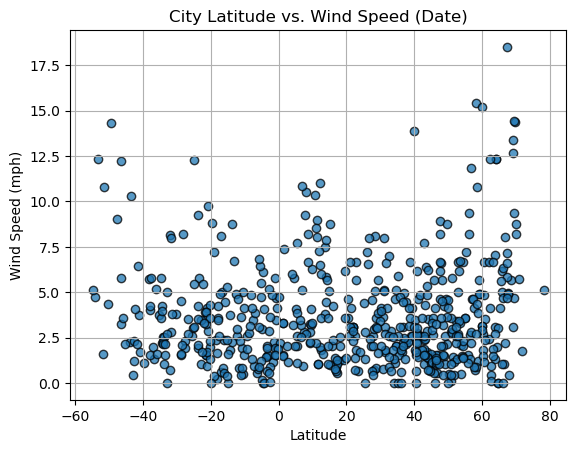

In [21]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, save_filename):
    """
    Create a linear regression plot and save the figure.

    Parameters:
        x_values (Series): The x-axis data.
        y_values (Series): The y-axis data.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        save_filename (str): File name to save the plot.

    Returns:
        None
    """

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create the linear regression equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Save the figure
    plt.savefig(f"output_data/{save_filename}")

    # Show plot
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_df[weather_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,igarka,67.4667,86.5833,250.95,80,100,7.17,RU,1706661729
2,4,along,28.1667,94.7667,282.94,94,98,0.70,IN,1706661729
3,5,nar'yan-mar,67.6713,53.0870,267.10,92,17,4.92,RU,1706661729
5,7,aldama,22.9167,-98.0667,294.54,73,100,1.82,MX,1706661730
6,8,fort st. john,56.2499,-120.8529,281.09,46,40,8.23,CA,1706661730


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_df[weather_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,3,grytviken,-54.2811,-36.5092,276.69,81,22,4.74,GS,1706661462
4,6,kruisfontein,-34.0033,24.7314,291.97,84,100,2.52,ZA,1706661730
9,11,puerto deseado,-47.7503,-65.8938,292.70,56,100,9.04,AR,1706661731
10,12,blackmans bay,-43.0167,147.3167,294.11,42,87,0.45,AU,1706661731
12,14,waitangi,-43.9535,-176.5597,290.83,97,100,2.24,NZ,1706661731


###  Temperature vs. Latitude Linear Regression Plot

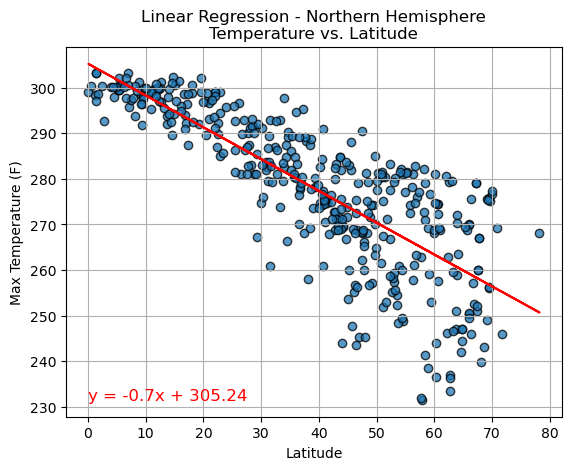

In [25]:
# Linear regression on Northern Hemisphere for Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression - Northern Hemisphere\nTemperature vs. Latitude",
                       "Latitude", "Max Temperature (F)", "Linear_Regression_Northern_Temperature_Latitude.png")


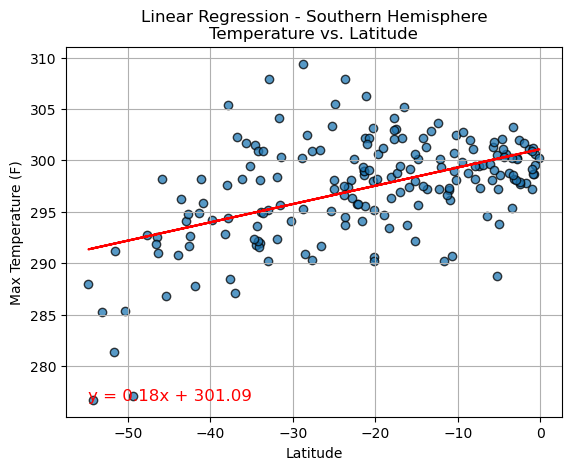

In [26]:
# Linear regression on Southern Hemisphere for Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression - Southern Hemisphere\nTemperature vs. Latitude",
                       "Latitude", "Max Temperature (F)", "Linear_Regression_Southern_Temperature_Latitude.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

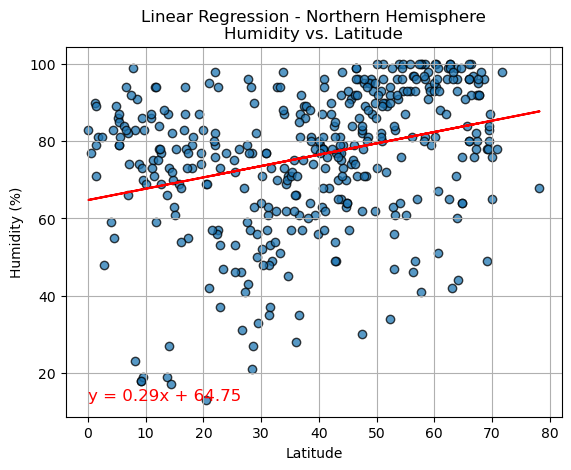

In [27]:
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression - Northern Hemisphere\nHumidity vs. Latitude",
                       "Latitude", "Humidity (%)", "Linear_Regression_Northern_Humidity_Latitude.png")


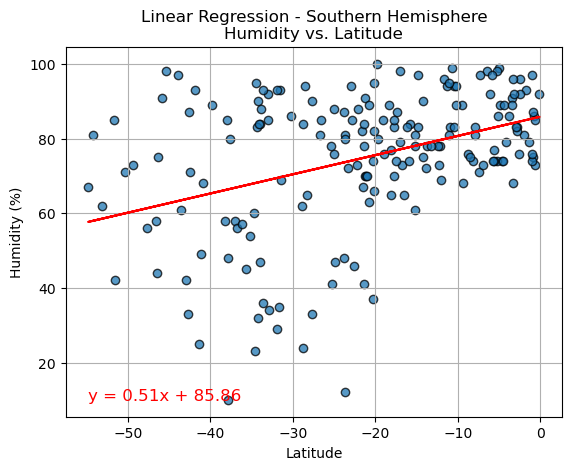

In [28]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression - Southern Hemisphere\nHumidity vs. Latitude",
                       "Latitude", "Humidity (%)", "Linear_Regression_Southern_Humidity_Latitude.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

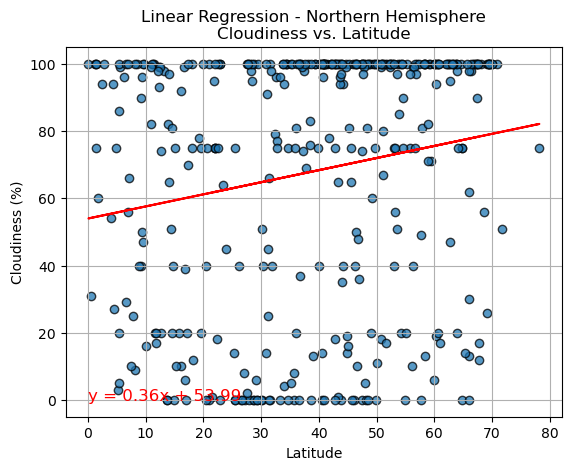

In [29]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression - Northern Hemisphere\nCloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)", "Linear_Regression_Northern_Cloudiness_Latitude.png")


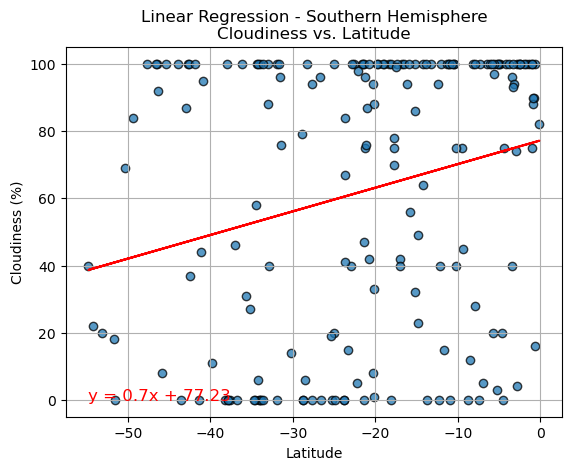

In [30]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression - Southern Hemisphere\nCloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)", "Linear_Regression_Southern_Cloudiness_Latitude.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

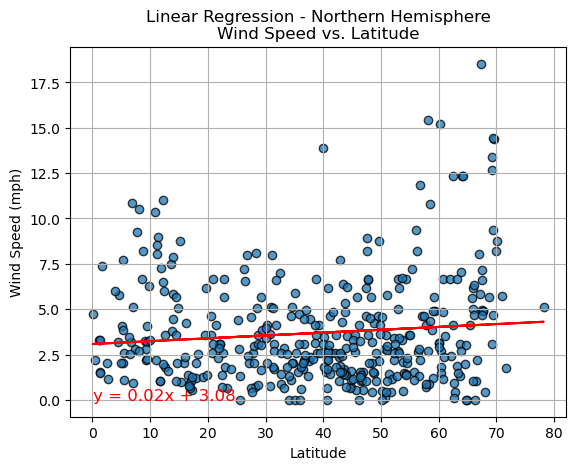

In [32]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression - Northern Hemisphere\nWind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)", "Linear_Regression_Northern_WindSpeed_Latitude.png")



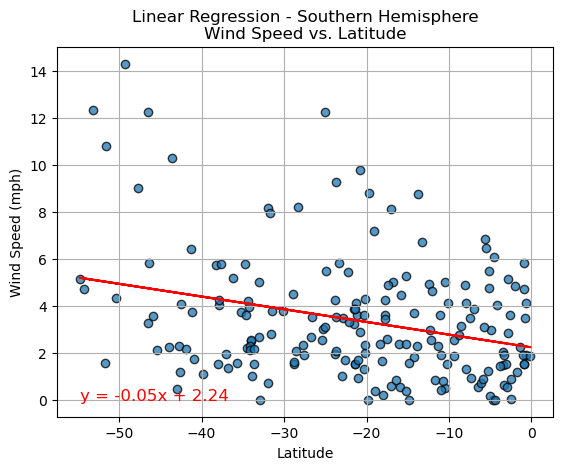

In [34]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression - Southern Hemisphere\nWind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)", "Linear_Regression_Southern_WindSpeed_Latitude.png")




**Discussion about the linear relationship:** YOUR RESPONSE HERE